In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [3]:
#alterar eleitores por eleição

eleitores = 115344489

In [29]:
names = ['TRASH1', 'TRASH2', 'TRASH3', 'NR_TURNO', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'NM_URNA_CANDIDATO', 'DS_CARGO', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'SG_PARTIDO', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24', 'QT_VOTOS_NOMINAIS']

In [30]:
df = pd.read_csv('votacao_candidato_munzona_2002_BR.txt', names = names, sep = ';', encoding='latin-1')

In [31]:
df.sample(1)

,TRASH1,TRASH2,TRASH3,NR_TURNO,TRASH4,TRASH5,TRASH6,TRASH7,TRASH8,TRASH9,TRASH10,TRASH11,TRASH12,TRASH13,NM_URNA_CANDIDATO,DS_CARGO,TRASH14,TRASH15,TRASH16,TRASH17,TRASH18,TRASH19,TRASH20,SG_PARTIDO,TRASH21,TRASH22,TRASH23,TRASH24,QT_VOTOS_NOMINAIS
24292,05/04/2016,17:16:40,2002,1,ELEICOES 2002,RN,18074,18074,PUREZA,6,1,40,9578,ANTHONY WILLIAM GAROTINHO MATHEUS DE OLIVEIRA,GAROTINHO,PRESIDENTE,-1,#NE#,2,DEFERIDO,4,NÃO ELEITO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,10,COLIGAÇÃO 'FRENTE BRASIL ESPERANÇA',PSB / PGT / PTC,336


In [32]:

droplist = ['TRASH1', 'TRASH2', 'TRASH3', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24']




In [33]:
df = df.drop(droplist, axis = 1)

In [34]:
df.sample(2)

,NR_TURNO,NM_URNA_CANDIDATO,DS_CARGO,SG_PARTIDO,QT_VOTOS_NOMINAIS
1595,1,RUI COSTA PIMENTA,PRESIDENTE,PCO,9
46397,2,JOSÉ SERRA,PRESIDENTE,PSDB,9601


### Filtro por Cargo

In [35]:
dfpresidente = df[df.DS_CARGO == 'PRESIDENTE']

# Primeiro Turno

In [36]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [37]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,LULA,39436640,34.190311
1,PSDB,JOSÉ SERRA,19695227,17.075135
2,PSB,GAROTINHO,15176422,13.157475
3,PPS,CIRO,10166540,8.814067
4,PSTU,ZÉ MARIA,402032,0.348549
5,Outros,Outros,38517,0.033393


([<matplotlib.patches.Wedge at 0x23b96ead3c8>,
 [Text(-0.8108224871005577, -0.7433484340550305, 'Votos Totais'),
  Text(0.884533546367183, 0.8109256472396805, 'Não Votaram')],
 [Text(-0.4422668111457587, -0.40546278221183474, '73.6%'),
  Text(0.5159779020475234, 0.47303996088981365, '26.4%')])

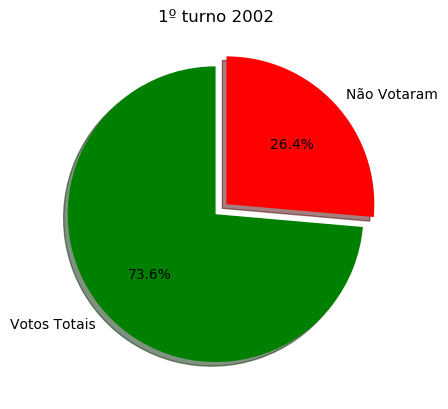

In [38]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 2002')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x23b96ccf448>,
 [Text(-1.1925124013533983, 0.1338438366842176, 'LULA'),
  Text(0.5323047456578356, -0.9626274761038909, 'JOSÉ SERRA'),
  Text(1.0724053499706094, 0.24484028539930855, 'GAROTINHO'),
  Text(0.47692991508431526, 1.101152966711559, 'CIRO'),
  Text(0.030129801984938774, 1.69973297756805, 'ZÉ MARIA'),
  Text(0.0022807401541957194, 1.5999983744442834, 'Outros')],
 [Text(-0.6956322341228157, 0.07807557139912694, '46.4%'),
  Text(0.29034804308609213, -0.5250695324203041, '23.2%'),
  Text(0.5849483727112414, 0.13354924658144102, '17.9%'),
  Text(0.2782091171325172, 0.6423392305817427, '12.0%'),
  Text(0.02126809551878031, 1.199811513577447, '0.5%'),
  Text(0.001568008856009557, 1.0999988824304447, '0.0%')])

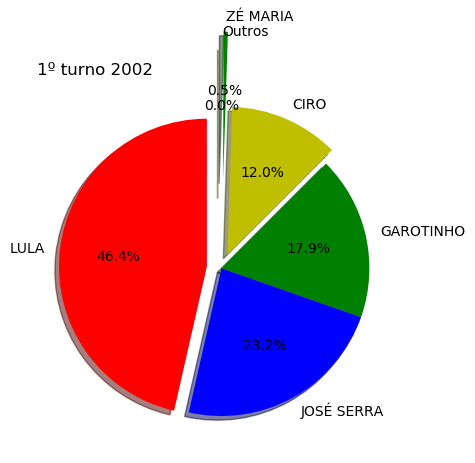

In [39]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.1, 0.6, 0.5)
colors = ('r', 'b', 'g', 'y', 'g', 'y')

plt.pyplot.title('1º turno 2002', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)


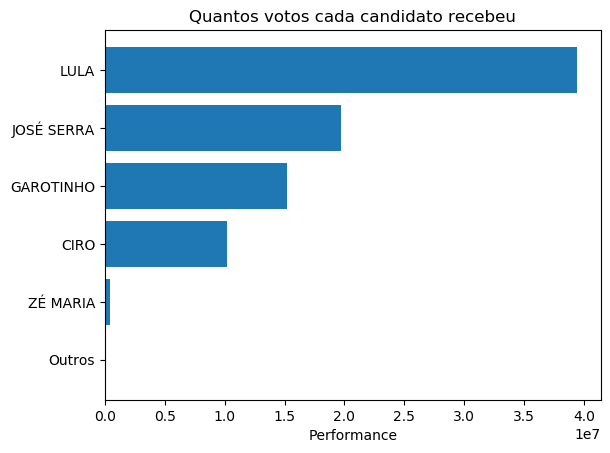

In [40]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

# Segundo Turno

In [41]:
#Escolher Turno
dfpresidente2turno = dfpresidente[dfpresidente.NR_TURNO == 2]
#Grupar por
votostotais2turno = dfpresidente2turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais2turno['Porcentagem'] = votostotais2turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais2turno = votostotais2turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v2 = votostotais2turno.QT_VOTOS_NOMINAIS.sum()

([<matplotlib.patches.Wedge at 0x23b96c2cdc8>,
 [Text(-0.7858004583909819, -0.769751673978383, 'Votos Totais'),
  Text(0.8572370209414624, 0.8397289383648793, 'Não Votaram')],
 [Text(-0.42861843184962645, -0.4198645494427543, '74.7%'),
  Text(0.5000549288825197, 0.4898418807128462, '25.3%')])

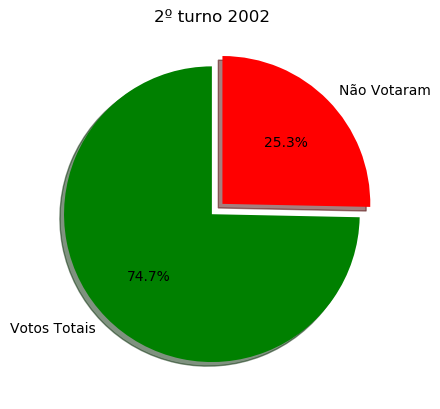

In [42]:
#Grafico de Pizza

labels = 'Votos Totais', 'Não Votaram'
sizes = [v2, (eleitores-v2)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('2º turno 2002')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

([<matplotlib.patches.Wedge at 0x23b96ef2b08>,
 [Text(-1.0317572092158795, -0.3814145529880313, 'LULA'),
  Text(1.1255532801875645, 0.4160887086415757, 'JOSÉ SERRA')],
 [Text(-0.5627766595722979, -0.20804430162983523, '61.3%'),
  Text(0.6565727467760794, 0.24271841337425248, '38.7%')])

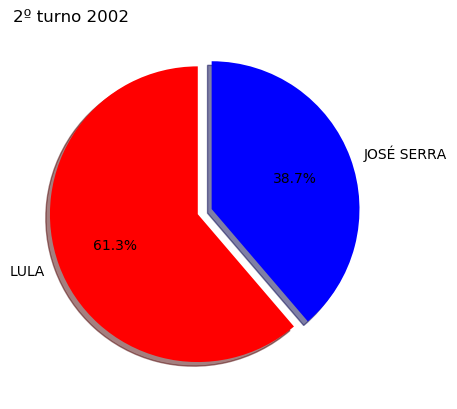

In [43]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1)
colors = ('r','b')

plt.pyplot.title('2º turno 2002', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

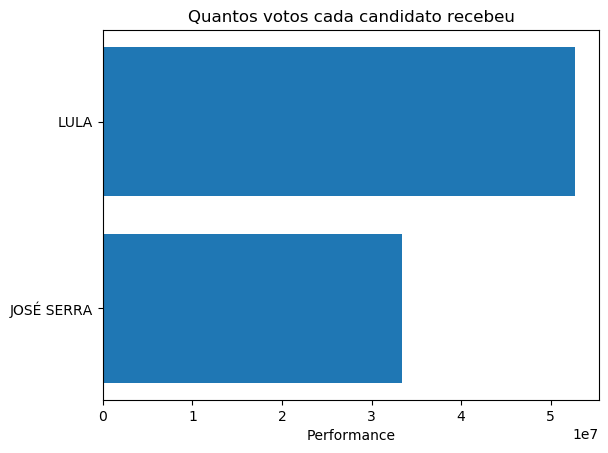

In [44]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [45]:
votostotais2turno = votostotais2turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v2), 
                                              'Porcentagem' : 100-votostotais2turno.Porcentagem.sum() } , ignore_index=True)
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,LULA,52772592,45.752157
1,PSDB,JOSÉ SERRA,33356997,28.919454
2,Não Votaram,Não Votaram,29214900,25.328388


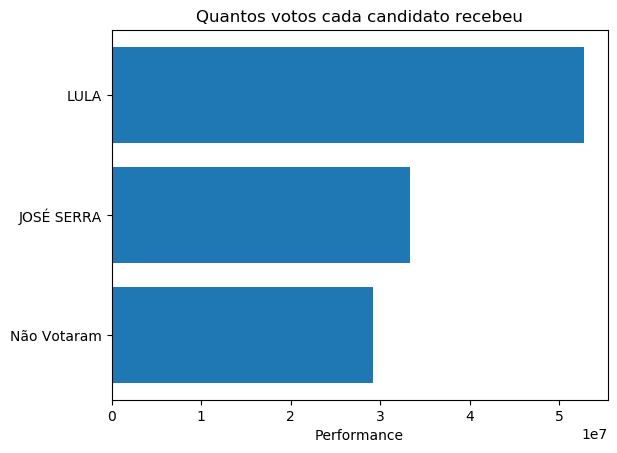

In [46]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x23b96e168c8>,
 [Text(-1.0902196643401512, 0.14635943251477956, 'LULA'),
  Text(0.7182043385879403, -0.9613441257080938, 'JOSÉ SERRA'),
  Text(0.8572364705935974, 0.8397295001869546, 'Não Votaram')],
 [Text(-0.5946652714582642, 0.0798324177353343, '45.8%'),
  Text(0.4189525308429652, -0.5607840733297214, '28.9%'),
  Text(0.5000546078462651, 0.4898422084423902, '25.3%')])

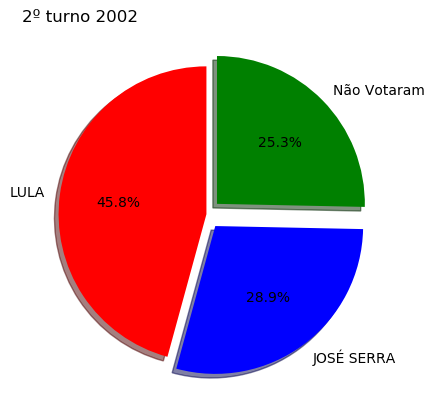

In [47]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1, 0.1)
colors = ('r','b','g')

plt.pyplot.title('2º turno 2002', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

In [48]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,LULA,39436640,34.190311
1,PSDB,JOSÉ SERRA,19695227,17.075135
2,PSB,GAROTINHO,15176422,13.157475
3,PPS,CIRO,10166540,8.814067
4,PSTU,ZÉ MARIA,402032,0.348549
5,Outros,Outros,38517,0.033393
6,Não Votaram,Não Votaram,30429111,26.381071


# Salvar os Arquivos CSV

In [49]:
votostotais1turno['Ano'] = 2002
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,LULA,39436640,34.190311,2002
1,PSDB,JOSÉ SERRA,19695227,17.075135,2002
2,PSB,GAROTINHO,15176422,13.157475,2002
3,PPS,CIRO,10166540,8.814067,2002
4,PSTU,ZÉ MARIA,402032,0.348549,2002
5,Outros,Outros,38517,0.033393,2002
6,Não Votaram,Não Votaram,30429111,26.381071,2002


In [50]:
votostotais1turno.to_csv('1turno_2002.csv')

In [51]:
votostotais2turno['Ano'] = 2002
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,LULA,52772592,45.752157,2002
1,PSDB,JOSÉ SERRA,33356997,28.919454,2002
2,Não Votaram,Não Votaram,29214900,25.328388,2002


In [52]:
votostotais2turno.to_csv('2turno_2002.csv')